<a href="https://colab.research.google.com/github/sricinu/SVHN-CNN/blob/master/R8/Internal_Lab/R8_Internal_Lab_Questions_Transfer_Learning_MNIST_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0..4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5..9].

## 1. Import necessary libraries for the model

In [0]:
#Importing important modules
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Import MNIST data and create 2 datasets with one dataset having digits from 0 to 4 and other from 5 to 9 

In [0]:
import h5py
import numpy as np

# Open the file as readonly. The file should be present inside a directory called "data" in the same folder as code
h5f = h5py.File('/content/drive/My Drive/AIML/R7/SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

## 3. Print x_train, y_train, x_test and y_test for both the datasets

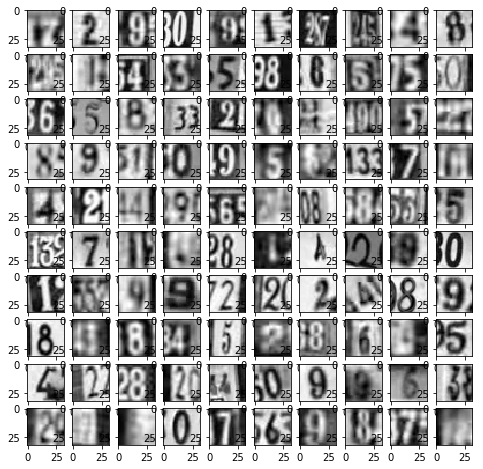

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [41]:
print(x_train.shape)


(42000, 32, 32)


In [42]:
print(y_train.shape)

(42000,)


In [43]:
print(x_test.shape)


(18000, 32, 32)


In [44]:
print(y_test.shape)


(18000,)


## ** 4. Let us take only the dataset (x_train, y_train, x_test, y_test) for Integers 0 to 4 in MNIST **
## Reshape x_train and x_test to a 4 Dimensional array (channel = 1) to pass it into a Conv2D layer

In [0]:
# create two datasets one with digits below 5 and one with 5 and above
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]


In [0]:
x_train_gte5 = x_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5
x_test_gte5 = x_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5

In [0]:

# input image dimensions
img_rows, img_cols = 32, 32

if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)


## 5. Normalize x_train and x_test by dividing it by 255

In [0]:
import datetime

batch_size = 128
num_classes = 5
epochs = 5
now = datetime.datetime.now

def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    t = now()
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Training time: %s' % (now() - t))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])



## 6. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:

#done in the above function

## 7. Build a sequential model with 2 Convolutional layers with 32 kernels of size (3,3) followed by a Max pooling layer of size (2,2) followed by a drop out layer to be trained for classification of digits 0-4  

In [0]:
from keras.layers import Dense, Dropout, Activation, Flatten

# number of convolutional filters to use
filters = 32
# size of pooling area for max pooling
pool_size = 2
# convolution kernel size
kernel_size = 3

# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]


## 8. Post that flatten the data and add 2 Dense layers with 128 neurons and neurons = output classes with activation = 'relu' and 'softmax' respectively. Add dropout layer inbetween if necessary  

In [0]:

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)


## 9. Print the training and test accuracy

In [52]:
# train model for 5-digit classification [0..4]
train_model(model,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)


('x_train shape:', (21024, 32, 32, 1))
(21024, 'train samples')
(8976, 'test samples')


W0901 12:28:21.447808 140704768374656 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 21024 samples, validate on 8976 samples
Epoch 1/5
21024/21024 [==============================] - 10s 471us/step - loss: 1.3573 - acc: 0.4277 - val_loss: 0.9129 - val_acc: 0.6552
Epoch 2/5
21024/21024 [==============================] - 3s 134us/step - loss: 0.5677 - acc: 0.8156 - val_loss: 0.3839 - val_acc: 0.8876
Epoch 3/5
21024/21024 [==============================] - 3s 134us/step - loss: 0.3883 - acc: 0.8786 - val_loss: 0.3047 - val_acc: 0.9096
Epoch 4/5
21024/21024 [==============================] - 3s 133us/step - loss: 0.3159 - acc: 0.8998 - val_loss: 0.2721 - val_acc: 0.9164
Epoch 5/5
21024/21024 [==============================] - 3s 134us/step - loss: 0.2802 - acc: 0.9088 - val_loss: 0.2520 - val_acc: 0.9260
Training time: 0:00:21.573888
('Test score:', 0.25201348212685387)
('Test accuracy:', 0.9260249554367201)


## 10. Make only the dense layers to be trainable and convolutional layers to be non-trainable

In [0]:
# freeze feature layers and rebuild model
for l in feature_layers:
    l.trainable = False


## 11. Use the model trained on 0 to 4 digit classification and train it on the dataset which has digits 5 to 9  (Using Transfer learning keeping only the dense layers to be trainable)

## 12. Print the accuracy for classification of digits 5 to 9

In [54]:
train_model(model,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)


('x_train shape:', (20976, 32, 32, 1))
(20976, 'train samples')
(9024, 'test samples')
Train on 20976 samples, validate on 9024 samples
Epoch 1/5
20976/20976 [==============================] - 2s 102us/step - loss: 1.0226 - acc: 0.5991 - val_loss: 0.5476 - val_acc: 0.8419
Epoch 2/5
20976/20976 [==============================] - 2s 84us/step - loss: 0.5805 - acc: 0.8012 - val_loss: 0.3941 - val_acc: 0.8833
Epoch 3/5
20976/20976 [==============================] - 2s 83us/step - loss: 0.4706 - acc: 0.8436 - val_loss: 0.3483 - val_acc: 0.8948
Epoch 4/5
20976/20976 [==============================] - 2s 83us/step - loss: 0.4199 - acc: 0.8602 - val_loss: 0.3339 - val_acc: 0.8925
Epoch 5/5
20976/20976 [==============================] - 2s 84us/step - loss: 0.3923 - acc: 0.8726 - val_loss: 0.3093 - val_acc: 0.8979
Training time: 0:00:09.450037
('Test score:', 0.30926664226444056)
('Test accuracy:', 0.897938829787234)


## Sentiment analysis <br> 

The objective of the second problem is to perform Sentiment analysis from the tweets data collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

### 13. Read the dataset (tweets.csv) and drop the NA's while reading the dataset

In [1]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from ast import literal_eval
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/AIML/R8/tweets.csv')

In [9]:
data.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


### 14. Preprocess the text and add the preprocessed text in a column with name `text` in the dataframe.

In [0]:
def preprocess(text):
    try:
        return text.decode('ascii')
    except Exception as e:
        return ""

In [0]:
data['text'] = [preprocess(text) for text in data.tweet_text]

In [12]:
data.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


### 15. Consider only rows having Positive emotion and Negative emotion and remove other rows from the dataframe.

In [0]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
data_pos_neg = data[(data.is_there_an_emotion_directed_at_a_brand_or_product=='Positive emotion') | (data.is_there_an_emotion_directed_at_a_brand_or_product=='Negative emotion')]

In [41]:
data_pos_neg.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


In [44]:
neg_phrases = data_pos_neg[data_pos_neg.is_there_an_emotion_directed_at_a_brand_or_product == 'Negative emotion']
neg_words = []
for t in neg_phrases.text:
    neg_words.append(t)
neg_words[:4]

[u'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
 u"@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw",
 u'I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone',
 '']

In [45]:
neg_text = pd.Series(neg_words).str.cat(sep=' ')
neg_text[:100]

u'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade'

In [47]:
for t in neg_phrases.text[:300]:
    if 'good' in t:
        print(t)

compiling my #sxsw list in one google doc is taking a lot longer than i thought... so many parties. so many good musicians.
if #Apple weren't so cocky, perhaps a separate ipad2 store at #SXSW would have been a good idea. guess they don't need the extra marketing;)
Just launched the pop-up Apple Store at #SXSW. It's our &quot;vintage&quot; store format: Mostly iPods and snarky employees. Ah, the good old days.
I composed a tweet so acerbic and cynical about ipad users that my phone crashed and dumped all my apps. #twitterpower #sxsw #imthatgood
Fest tip-don't be an iPhone douche.Put away your phone and talk to your fellow festgoers in lines, etc.All good people who love film. #sxsw
Why the heck would anyone want Mozilla to switch to CrapKit (WebKit) when Gecko is good? Stupid Apple/Google bandwaggoners. #sxsw
#Mullenweg admits that iPhone app for Wordpress is not very good yet. Which is very true. Respect his honesty and awareness #sxsw
@mention good job @mention #sxsw! went home &amp; 

In [50]:
pos_phrases = data_pos_neg[data_pos_neg.is_there_an_emotion_directed_at_a_brand_or_product == 'Positive emotion'] ## 4 is positive sentiment
pos_string = []
for t in pos_phrases.text:
    pos_string.append(t)
pos_text = pd.Series(pos_string).str.cat(sep=' ')
pos_text[:100]


u"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design"

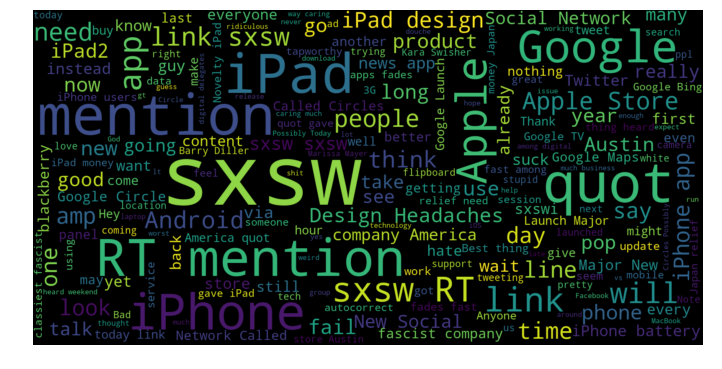

In [53]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

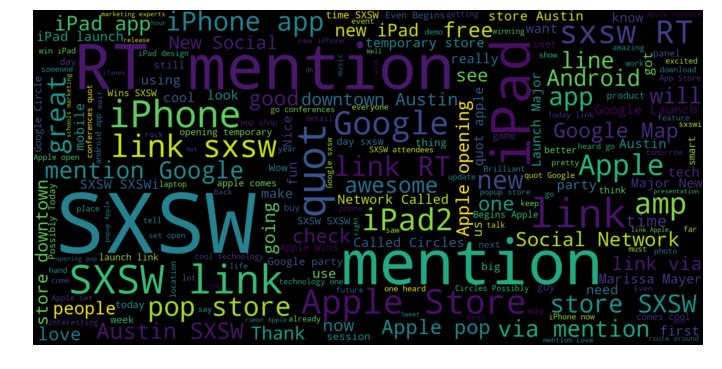

In [54]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 16. Represent text as numerical data using `CountVectorizer` and get the document term frequency matrix

#### Use `vect` as the variable name for initialising CountVectorizer.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [33]:
data_pos_neg

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,"#SXSW is just starting, #CTIA is around the co..."
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,Beautifully smart and simple idea RT @madebyma...
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,Counting down the days to #sxsw plus strong Ca...
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,Excited to meet the @samsungmobileus at #sxsw ...
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion,Find &amp; Start Impromptu Parties at #SXSW Wi...


In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))
cvector.fit(data_pos_neg.text)


CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### 17. Find number of different words in vocabulary

In [57]:
len(cvector.get_feature_names())

31363

In [0]:
neg_matrix = cvector.transform(neg_phrases.text)
pos_matrix = cvector.transform(pos_phrases.text)

#### Tip: To see all available functions for an Object use dir

### 18. Find out how many Positive and Negative emotions are there.

Hint: Use value_counts on that column

In [0]:
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])

In [72]:
neg_tf.head()

,Terms,negative
0,sxsw,561
1,the,299
2,mention,288
3,to,248
4,ipad,183


In [74]:
neg_tf_df = neg_tf.set_index('Terms')
neg_tf_df.head()

,negative
Terms,
sxsw,561
the,299
mention,288
to,248
ipad,183


In [76]:
som_pos_words = pos_matrix.sum(axis=0)
som_pos_words_freq = [(word, som_pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
som_pos_words_tf = pd.DataFrame(list(sorted(som_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','some-positive'])
som_pos_words_tf_df = som_pos_words_tf.set_index('Terms')
som_pos_words_tf_df.head()

,some-positive
Terms,
sxsw,2983
mention,2019
the,1528
link,1131
to,1108


### 19. Change the labels for Positive and Negative emotions as 1 and 0 respectively and store in a different column in the same dataframe named 'Label'

Hint: use map on that column and give labels

In [79]:
term_freq_df = pd.concat([neg_tf_df,som_pos_words_tf_df],axis=1)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [82]:
term_freq_df['total'] = term_freq_df['negative'] +  term_freq_df['some-positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(20)


,negative,some-positive,total
sxsw,561,2983,3544
mention,288,2019,2307
the,299,1528,1827
to,248,1108,1356
link,87,1131,1218
ipad,183,979,1162
at,138,984,1122
rt,131,887,1018
rt mention,131,858,989
apple,115,871,986


Text(0.5,1,'Top 500 phrases in twitter reviews')

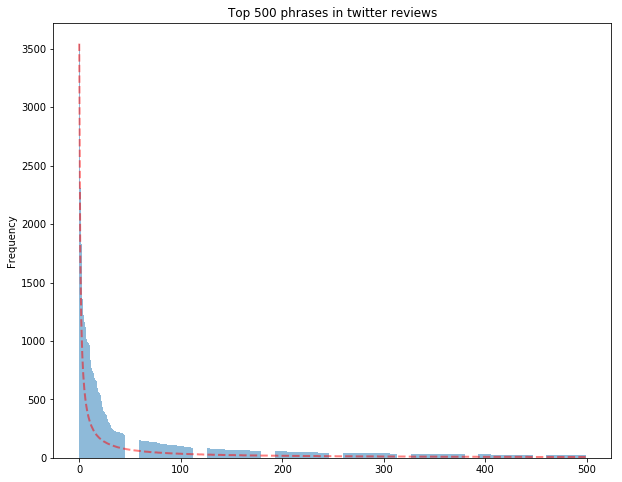

In [85]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 phrases in twitter reviews')

/usr/local/lib/python2.7/dist-packages/pandas/core/indexes/base.py:4375: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  tz=getattr(series.dtype, 'tz', None))


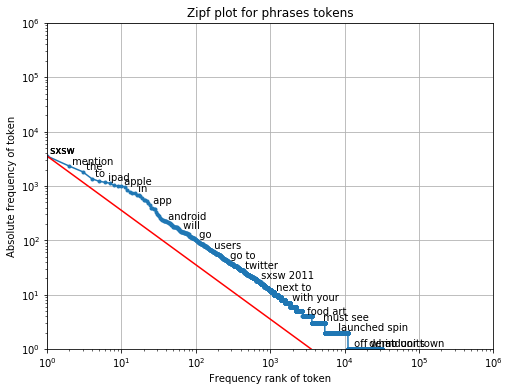

In [86]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for phrases tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")


### 20. Define the feature set (independent variable or X) to be `text` column and `labels` as target (or dependent variable)  and divide into train and test datasets

In [172]:

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=sorted(tags_counts.keys()))
sentiments = mlb.fit_transform(data_pos_neg['is_there_an_emotion_directed_at_a_brand_or_product'])
sentiments.shape

TypeError: ignored

In [161]:
# Dictionary of all tags from train corpus with their counts.
tags_counts = {}
for tags in sentiments:
    for tag in tags:
        if tag in tags_counts:
            tags_counts[tag] += 1
        else:
            tags_counts[tag] = 1
print(tags_counts)

{'a': 570, ' ': 3548, 'e': 7666, 'g': 570, 'i': 10074, 'm': 3548, 'o': 10074, 'N': 570, 'P': 2978, 's': 2978, 't': 7096, 'v': 3548, 'n': 3548}


In [170]:
phrase = np.array(data_pos_neg['text'])
# build train and test datasets
print(sentiments.shape)
from sklearn.model_selection import train_test_split    
phrase_train, phrase_test, sentiments_train, sentiments_test = train_test_split(phrase, sentiments, test_size=0.2, random_state=4)

(3548, 13)


In [168]:
sentiments_test.shape

(710, 13)

In [169]:
sentiments_train.shape

(2838, 13)

In [0]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)


def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step=0.02, cmap=plt.cm.RdYlBu,
                                markers=None, alphas=None, colors=None):
    
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black', 
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Build Bag-Of-Words on train phrases
cv = CountVectorizer(stop_words='english',max_features=10000)
cv_train_features = cv.fit_transform(phrase_train)


In [0]:
# build TFIDF features on train reviews
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(phrase_train)


In [0]:
# transform test reviews into features
cv_test_features = cv.transform(phrase_test)
tv_test_features = tv.transform(phrase_test)

In [156]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)


('BOW model:> Train features shape:', (2838, 4955), ' Test features shape:', (710, 4955))
('TFIDF model:> Train features shape:', (2838, 26915), ' Test features shape:', (710, 26915))


## 21. **Predicting the sentiment:**


### Use Naive Bayes and Logistic Regression and their accuracy scores for predicting the sentiment of the given text

In [0]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
sgd = SGDClassifier(loss='hinge', n_iter=100)

In [158]:
# Logistic Regression model on BOW features
lr_bow_predictions = train_predict_model(classifier=lr, 
                                             train_features=cv_train_features, train_labels=sentiments_train,
                                             test_features=cv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=lr_bow_predictions,
                                      classes=[0,1])


ValueError: ignored

## 22. Create a function called `tokenize_predict` which can take count vectorizer object as input and prints the accuracy for x (text) and y (labels)

In [0]:
def tokenize_test(vect):
    x_train_dtm = vect.fit_transform(x_train)
    print('Features: ', x_train_dtm.shape[1])
    x_test_dtm = vect.transform(x_test)
    nb = MultinomialNB()
    nb.fit(x_train_dtm, y_train)
    y_pred_class = nb.predict(x_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

### Create a count vectorizer function which includes n_grams = 1,2  and pass it to tokenize_predict function to print the accuracy score

### Create a count vectorizer function with stopwords = 'english'  and pass it to tokenize_predict function to print the accuracy score

### Create a count vectorizer function with stopwords = 'english' and max_features =300  and pass it to tokenize_predict function to print the accuracy score

### Create a count vectorizer function with n_grams = 1,2  and max_features = 15000  and pass it to tokenize_predict function to print the accuracy score

### Create a count vectorizer function with n_grams = 1,2  and include terms that appear at least 2 times (min_df = 2)  and pass it to tokenize_predict function to print the accuracy score